My name and stuff here

## Introduction

This is a binary classification project using chest xray images to determine if a patient has pneumonia or not. 
Image data comes from https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [82]:
#importing packages that are going to be used
import numpy as np
from PIL import Image, ImageOps
import glob
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

All the images need to be the same size, but the images in the dataset are not. I chose a pretty small image size, especially considering how large some of the images are. Everything is downsized to be the same dimensions. This is a part of the project I think that has potential to be improved on later, but will not be explored here. Its very resource heavy to use larger images.

## Data Exploration

In [2]:
norm_img = [] #since the healthy and not healthy images are saved in different folders, they're gonna be separate for a bit
sick_img = [] #they'll be combined together later
width = 75
height = 100
for filename in glob.glob('chest_xray/NORMAL/*.jpeg'):
    im=Image.open(filename).convert('L')
    im=im.resize((width, height))
    im=np.asarray(im)
    norm_img.append(im)

for filename in glob.glob('chest_xray/PNEUMONIA/*.jpeg'):
    im=Image.open(filename).convert('L')
    im=im.resize((width, height))
    im=np.asarray(im)
    sick_img.append(im)

sick_img = np.asarray(sick_img)
norm_img = np.asarray(norm_img)

The sick lungs seem to be darker in the chest cavity than the healthy lungs. This is really the only difference between the two that I can see.

Supposed to be white spots in a sick lung. 

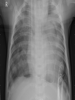

In [71]:
Image.fromarray(sick_img[101])

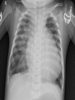

In [72]:
Image.fromarray(sick_img[150])

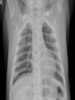

In [73]:
Image.fromarray(sick_img[236])

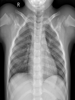

In [75]:
Image.fromarray(norm_img[173])

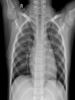

In [76]:
Image.fromarray(norm_img[109])

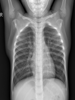

In [77]:
Image.fromarray(norm_img[132])

In [10]:
#block of code to check the dimensions for all the images. 
#this should all be in 1 key. 
d = {}
for img in sick_img:
    if img.shape in d:
        d[img.shape] +=1
    else:
        d[img.shape] =  1

for img in norm_img:
    if img.shape in d:
        d[img.shape] +=1
    else:
        d[img.shape] =  1
for i in sorted (d) : 
    print ((i, d[i]), end =" ") 

((100, 75), 5856) 

In [45]:
#create the labels and image vectors
labels = np.zeros(len(norm_img))
labels = np.concatenate((labels, np.ones(len(sick_img))), axis=0)
images = np.concatenate((norm_img, sick_img), axis=0)
images.shape

(5856, 100, 75)

The distribution between sick and healthy lungs is about 75:25, there's many more sick lungs than healthy lungs in the dataset. 

In [46]:
labels.shape

(5856,)

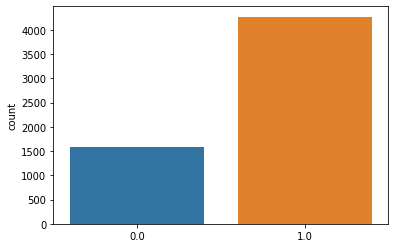

In [12]:
sns.countplot(labels)

In [13]:
#shouldn't be needed

#images = images.reshape(5856, 992*616).astype('float32')
#this is too big for me, but I can't normalize the data later either. Images are too large
#images = images.reshape(images.shape[0], width*height).astype('float32')

## Modeling

In [29]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = .25, random_state=33)

In [30]:
#pixel vaLues range from 0 to 255, so we're scaling the numbers to be between 0 and 1. 
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

In [31]:
#reshaping so that they fit into the model. 
X_train = X_train.reshape(X_train.shape[0], height, width, 1)
X_test = X_test.reshape(X_test.shape[0], height, width, 1)
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

In [33]:
#Function to make the loss and accuracy plots
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

### First model

In [61]:
model_1 = Sequential()
model_1.add(Conv2D(64, kernel_size=5, activation='relu', input_shape=(height,width,1)))
model_1.add(Flatten())
#only 2 choices, yes or no for pneumonia
model_1.add(Dense(1, activation='softmax'))

In [62]:
model_1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 96, 71, 64)        1664      
_________________________________________________________________
flatten_7 (Flatten)          (None, 436224)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 436225    
Total params: 437,889
Trainable params: 437,889
Non-trainable params: 0
_________________________________________________________________


In [63]:
model_1.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])

In [64]:
results_1 = model_1.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
138/138 [==============================] - 12s 83ms/step - loss: 0.5756 - acc: 0.7332 - val_loss: 0.4970 - val_acc: 0.7466
Epoch 2/5
138/138 [==============================] - 12s 84ms/step - loss: 0.3304 - acc: 0.7237 - val_loss: 0.2391 - val_acc: 0.7466
Epoch 3/5
138/138 [==============================] - 13s 93ms/step - loss: 0.2457 - acc: 0.7297 - val_loss: 0.2891 - val_acc: 0.7466
Epoch 4/5
138/138 [==============================] - 11s 80ms/step - loss: 0.2208 - acc: 0.7160 - val_loss: 0.2505 - val_acc: 0.7466
Epoch 5/5
138/138 [==============================] - 11s 83ms/step - loss: 0.2249 - acc: 0.7313 - val_loss: 0.1635 - val_acc: 0.7466


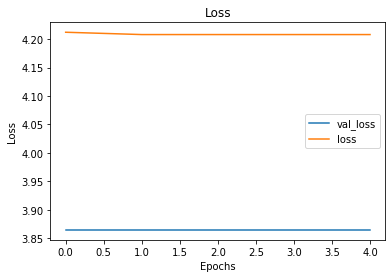

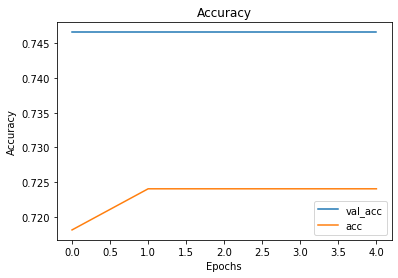

In [59]:
visualize_training_results(results_1)

This is a pretty bad model, but I didn't expect too much from it. It was very basic.

### Second Model

Add in a hidden layer in the middle. Use a few more epochs.

In [51]:
model_2 = Sequential()
model_2.add(Conv2D(64, kernel_size=5, activation='relu', input_shape=(height,width,1)))
model_2.add(Conv2D(32, kernel_size=3, activation='relu'))
model_2.add(Flatten())
#only 2 choices, yes or no for pneumonia
model_2.add(Dense(1, activation='softmax'))

In [52]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 96, 71, 64)        1664      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 94, 69, 32)        18464     
_________________________________________________________________
flatten_5 (Flatten)          (None, 207552)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 207553    
Total params: 227,681
Trainable params: 227,681
Non-trainable params: 0
_________________________________________________________________


In [53]:
model_2.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])

In [54]:
results_2 = model_2.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
138/138 [==============================] - 52s 376ms/step - loss: 0.5342 - acc: 0.7257 - val_loss: 0.2703 - val_acc: 0.7466
Epoch 2/10
138/138 [==============================] - 55s 399ms/step - loss: 0.3247 - acc: 0.7257 - val_loss: 0.2994 - val_acc: 0.7466
Epoch 3/10
138/138 [==============================] - 51s 367ms/step - loss: 0.2586 - acc: 0.7287 - val_loss: 0.3321 - val_acc: 0.7466
Epoch 4/10
138/138 [==============================] - 52s 376ms/step - loss: 0.2460 - acc: 0.7255 - val_loss: 0.1704 - val_acc: 0.7466
Epoch 5/10
138/138 [==============================] - 53s 385ms/step - loss: 0.1897 - acc: 0.7261 - val_loss: 0.1422 - val_acc: 0.7466
Epoch 6/10
138/138 [==============================] - 52s 380ms/step - loss: 0.1930 - acc: 0.7226 - val_loss: 0.1491 - val_acc: 0.7466
Epoch 7/10
138/138 [==============================] - 53s 385ms/step - loss: 0.1865 - acc: 0.7225 - val_loss: 0.2610 - val_acc: 0.7466
Epoch 8/10
138/138 [==============================] - 5

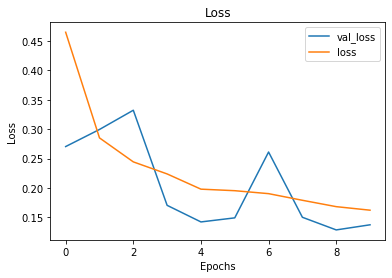

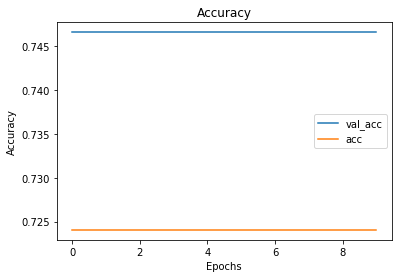

In [60]:
visualize_training_results(results_2)

Here I added in a hidden layer and the loss seems to be trending downwards. This might mean that I could use a few more epochs.

But the accuracy remaining unchanged is concerning. 

In [66]:
model_3 = Sequential()
model_3.add(Conv2D(64, kernel_size=5, activation='relu', input_shape=(height,width,1)))
model_3.add(Conv2D(32, kernel_size=3, activation='relu'))
model_3.add(Conv2D(16, kernel_size=3, activation='relu'))
model_3.add(Flatten())
#only 2 choices, yes or no for pneumonia
model_3.add(Dense(1, activation='softmax'))

In [67]:
model_3.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 96, 71, 64)        1664      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 94, 69, 32)        18464     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 92, 67, 16)        4624      
_________________________________________________________________
flatten_9 (Flatten)          (None, 98624)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 98625     
Total params: 123,377
Trainable params: 123,377
Non-trainable params: 0
_________________________________________________________________


In [68]:
model_3.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])

In [69]:
results_3 = model_3.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
138/138 [==============================] - 67s 482ms/step - loss: 0.5536 - acc: 0.7244 - val_loss: 0.6668 - val_acc: 0.7466
Epoch 2/10
138/138 [==============================] - 67s 487ms/step - loss: 0.4910 - acc: 0.7313 - val_loss: 0.5468 - val_acc: 0.7466
Epoch 3/10
138/138 [==============================] - 65s 474ms/step - loss: 0.2822 - acc: 0.7371 - val_loss: 0.2198 - val_acc: 0.7466
Epoch 4/10
138/138 [==============================] - 67s 482ms/step - loss: 0.2443 - acc: 0.7327 - val_loss: 0.2718 - val_acc: 0.7466
Epoch 5/10
138/138 [==============================] - 66s 481ms/step - loss: 0.2390 - acc: 0.7190 - val_loss: 0.1559 - val_acc: 0.7466
Epoch 6/10
138/138 [==============================] - 66s 477ms/step - loss: 0.2240 - acc: 0.7204 - val_loss: 0.1623 - val_acc: 0.7466
Epoch 7/10
138/138 [==============================] - 67s 488ms/step - loss: 0.1998 - acc: 0.7210 - val_loss: 0.1547 - val_acc: 0.7466
Epoch 8/10
138/138 [==============================] - 6

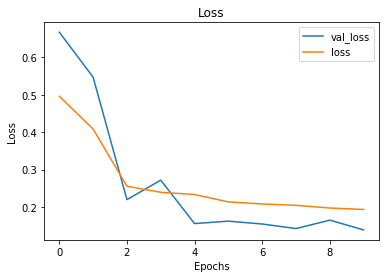

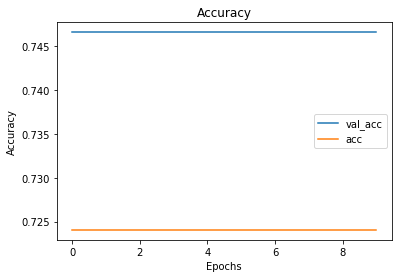

In [70]:
visualize_training_results(results_3)

In [78]:
results_4 = model_3.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
138/138 [==============================] - 68s 491ms/step - loss: 0.1845 - acc: 0.7240 - val_loss: 0.1488 - val_acc: 0.7466
Epoch 2/20
138/138 [==============================] - 66s 479ms/step - loss: 0.1798 - acc: 0.7240 - val_loss: 0.2503 - val_acc: 0.7466
Epoch 3/20
138/138 [==============================] - 69s 498ms/step - loss: 0.1821 - acc: 0.7240 - val_loss: 0.1440 - val_acc: 0.7466
Epoch 4/20
138/138 [==============================] - 68s 495ms/step - loss: 0.1753 - acc: 0.7240 - val_loss: 0.1294 - val_acc: 0.7466
Epoch 5/20
138/138 [==============================] - 67s 490ms/step - loss: 0.1688 - acc: 0.7240 - val_loss: 0.1550 - val_acc: 0.7466
Epoch 6/20
138/138 [==============================] - 67s 487ms/step - loss: 0.1648 - acc: 0.7240 - val_loss: 0.1521 - val_acc: 0.7466
Epoch 7/20
138/138 [==============================] - 69s 498ms/step - loss: 0.1612 - acc: 0.7240 - val_loss: 0.1334 - val_acc: 0.7466
Epoch 8/20
138/138 [==============================] - 6

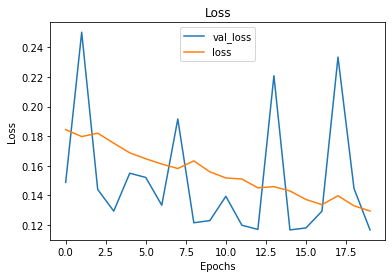

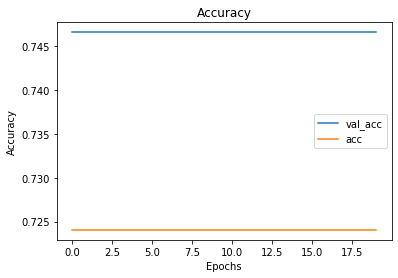

In [79]:
visualize_training_results(results_4)

The accuracy remaining unchanged is rather perplexing. Loss is now even more wild, despite only adding more epochs. Adding a dropout layer to see if that helps with the accuracy. 

In [83]:
model_5 = Sequential()
model_5.add(Conv2D(64, kernel_size=5, activation='relu', input_shape=(height,width,1)))
model_5.add(Conv2D(32, kernel_size=3, activation='relu'))
model_5.add(Dropout(0.1))
model_5.add(Conv2D(16, kernel_size=3, activation='relu'))
model_5.add(Flatten())
#only 2 choices, yes or no for pneumonia
model_5.add(Dense(1, activation='softmax'))

In [84]:
model_5.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 96, 71, 64)        1664      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 94, 69, 32)        18464     
_________________________________________________________________
dropout (Dropout)            (None, 94, 69, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 92, 67, 16)        4624      
_________________________________________________________________
flatten_10 (Flatten)         (None, 98624)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 98625     
Total params: 123,377
Trainable params: 123,377
Non-trainable params: 0
_______________________________________________

In [85]:
model_5.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])

In [86]:
results_5 = model_5.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
138/138 [==============================] - 77s 556ms/step - loss: 0.5849 - acc: 0.7216 - val_loss: 0.2742 - val_acc: 0.7466
Epoch 2/10
138/138 [==============================] - 77s 556ms/step - loss: 0.3338 - acc: 0.7293 - val_loss: 0.2679 - val_acc: 0.7466
Epoch 3/10
138/138 [==============================] - 76s 548ms/step - loss: 0.2637 - acc: 0.7129 - val_loss: 0.2383 - val_acc: 0.7466
Epoch 4/10
138/138 [==============================] - 75s 541ms/step - loss: 0.2250 - acc: 0.7234 - val_loss: 0.1980 - val_acc: 0.7466
Epoch 5/10
138/138 [==============================] - 76s 552ms/step - loss: 0.2097 - acc: 0.7253 - val_loss: 0.1544 - val_acc: 0.7466
Epoch 6/10
138/138 [==============================] - 75s 544ms/step - loss: 0.1926 - acc: 0.7298 - val_loss: 0.2079 - val_acc: 0.7466
Epoch 7/10
138/138 [==============================] - 77s 558ms/step - loss: 0.2017 - acc: 0.7259 - val_loss: 0.1407 - val_acc: 0.7466
Epoch 8/10
138/138 [==============================] - 7

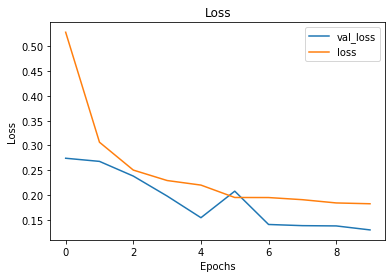

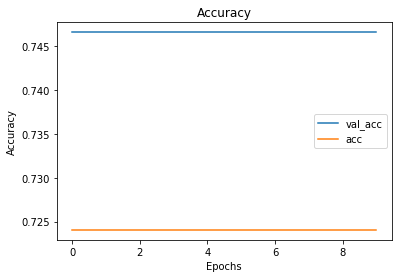

In [87]:
visualize_training_results(results_5)

This is the last model. It looks like the model is just predicting everything is pneumonia and that's why the accuracy is remaining unchanged. 

## Conclusion

The model will predict if a patient has pneumonia correctly more times than not, but the accuracy is still not high enough to allow the model to predict without any supervision. A doctor should still be present to confirm the diagnosis predicted by the model before beginning or foregoing any treatment. 